In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

/Users/yamamotomasaomi/.pyenv/versions/anaconda3-5.1.0/envs/makuwo/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
images, labels = mnist.train.next_batch(10)

In [4]:
# print (images[0])

In [5]:
print (labels[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
%config IPCompleter.greedy=True
%matplotlib inline
%matplotlib notebook

<IPython.core.display.Javascript object>


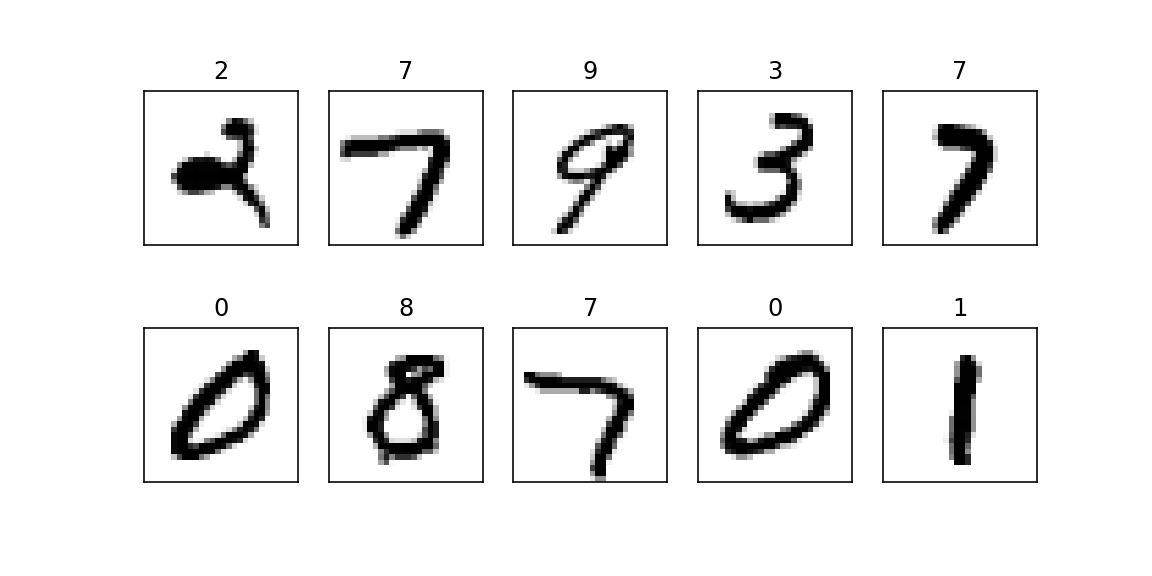

In [7]:
fig = plt.figure(figsize=(8,4))
for c, (image,label) in enumerate(zip(images,labels)):
    subplot = fig.add_subplot(2,5,c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(label))
    subplot.imshow(image.reshape((28,28)), vmin = 0, vmax=1, cmap=plt.cm.gray_r, interpolation="nearest")

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal,permutation
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20160512)

In [9]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [10]:
x = tf.placeholder(tf.float32,[None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)
# p = tf.sigmoid(f)

In [11]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
# loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [12]:
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [13]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [14]:
i=0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:batch_xs, t:batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss,accuracy],feed_dict={x:mnist.test.images,t:mnist.test.labels})
        print ('Step:%d, Loss:%f, Accuracy:%f' % (i, loss_val, acc_val) )

Step:100, Loss:7539.039551, Accuracy:0.850200
Step:200, Loss:5349.639160, Accuracy:0.878300
Step:300, Loss:4524.375977, Accuracy:0.890100
Step:400, Loss:4064.886963, Accuracy:0.898200
Step:500, Loss:3780.600830, Accuracy:0.904900
Step:600, Loss:3596.834961, Accuracy:0.906900
Step:700, Loss:3459.273926, Accuracy:0.908500
Step:800, Loss:3325.593750, Accuracy:0.910000
Step:900, Loss:3257.042969, Accuracy:0.912300
Step:1000, Loss:3180.781250, Accuracy:0.914500
Step:1100, Loss:3101.453369, Accuracy:0.914900
Step:1200, Loss:3069.273193, Accuracy:0.915300
Step:1300, Loss:3044.417969, Accuracy:0.916400
Step:1400, Loss:2984.512939, Accuracy:0.917400
Step:1500, Loss:2970.010742, Accuracy:0.917200
Step:1600, Loss:2948.183350, Accuracy:0.918600
Step:1700, Loss:2897.950684, Accuracy:0.918800
Step:1800, Loss:2897.307617, Accuracy:0.919100
Step:1900, Loss:2868.282715, Accuracy:0.918200
Step:2000, Loss:2836.352051, Accuracy:0.922700


<IPython.core.display.Javascript object>


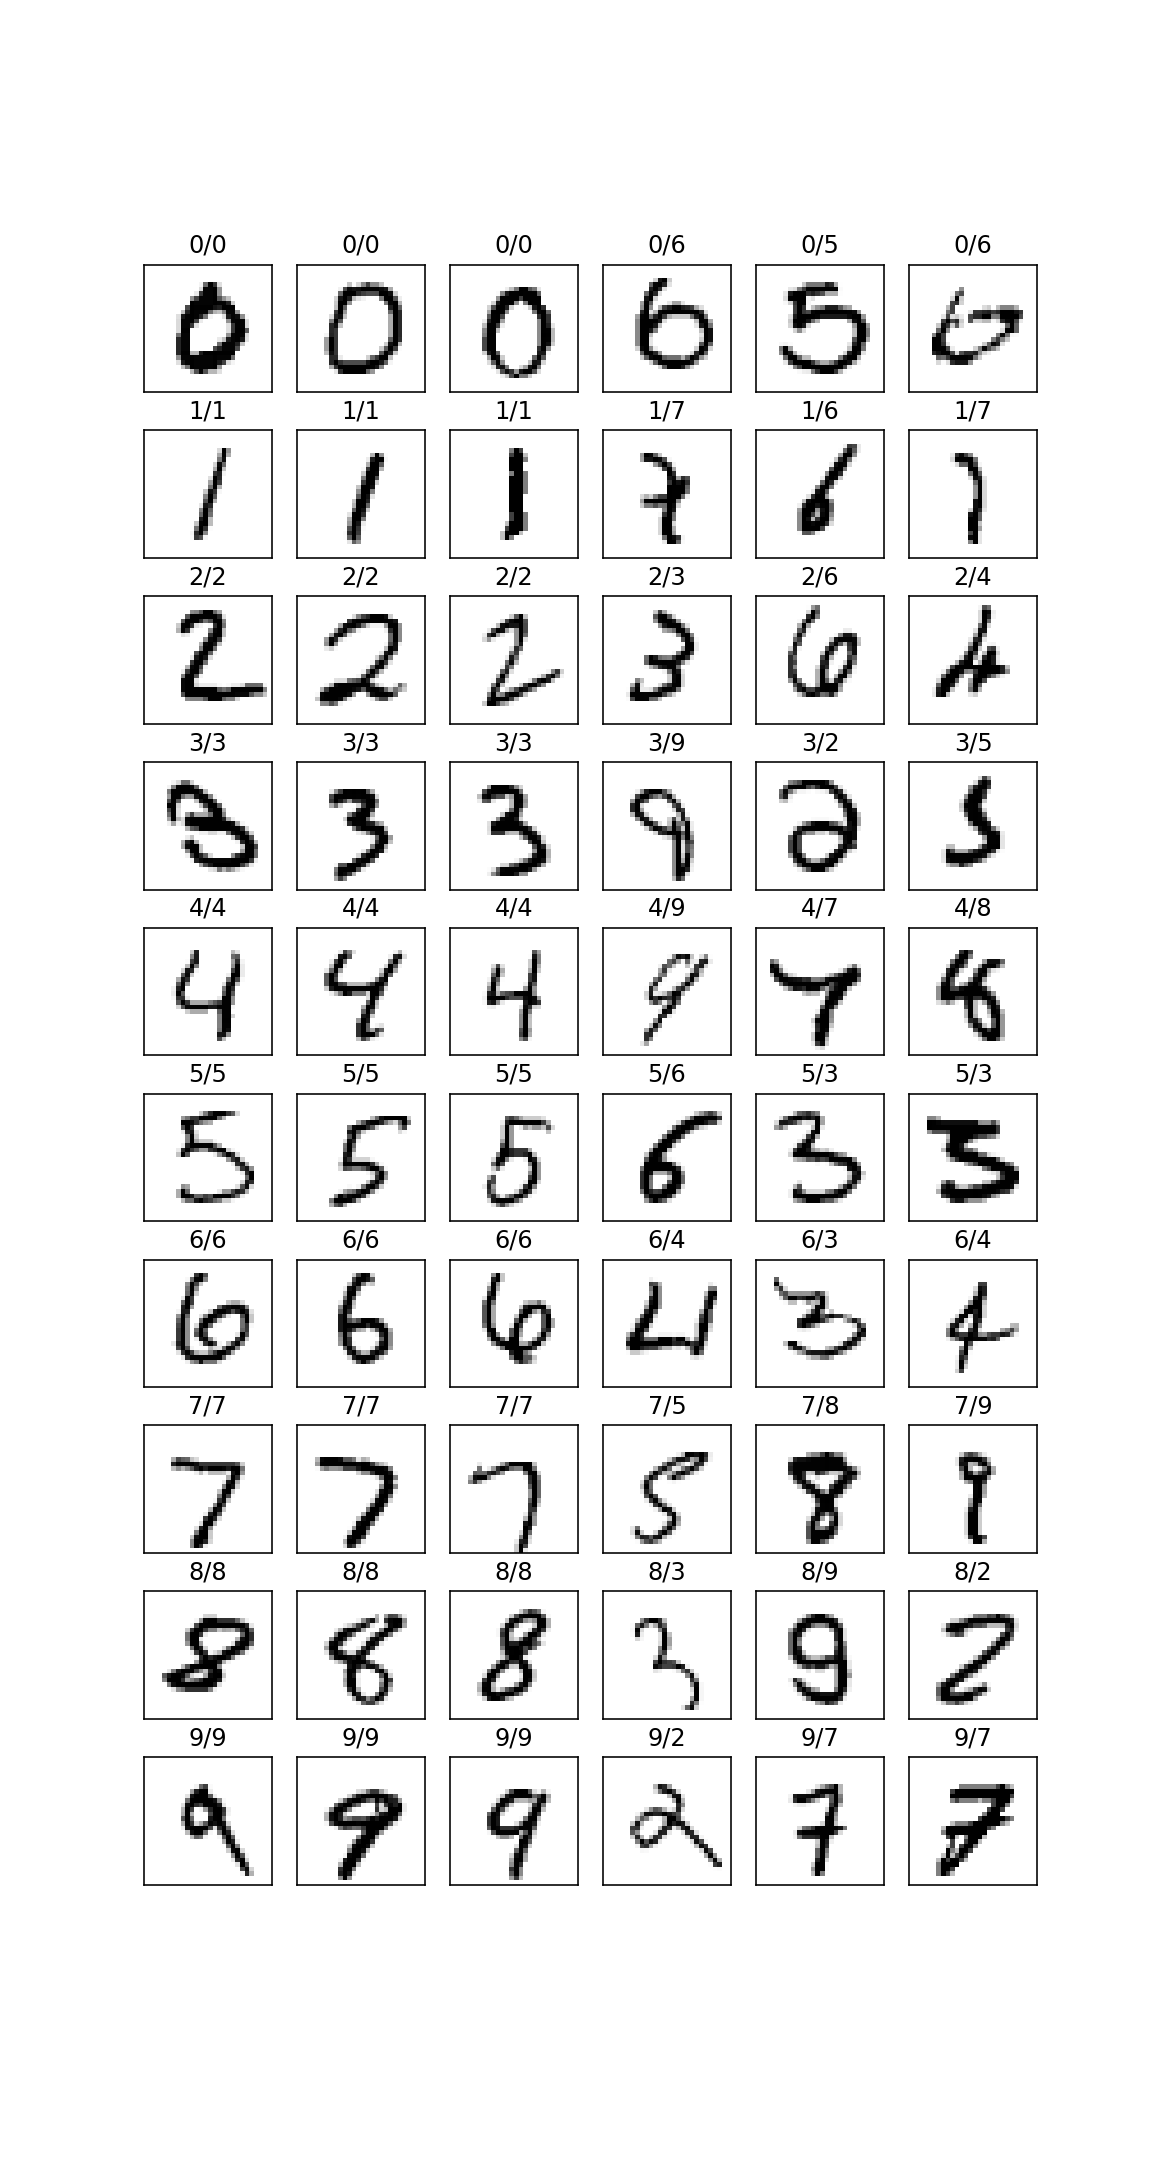

In [15]:
images, labels = mnist.test.images,mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t:labels})
fig = plt.figure(figsize = (8,15))

for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
#         print(i)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d/%d' % (prediction,actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break

# 復習
先週のは、Mnistを使った分類法について一応分類して見ましょうと言う話ではあるが
とにかく、Mnistを触ってみようと言う意味合いでやって見た次第というわけ
これから先、別のも動かしてみようということになった
mnistをもちいて、これまでのロジスティック回帰をしてもらおうということになったのだ

例えば、０かそうでないかという分岐をしてみよう
０か否か（正答率に関する話ということなので、選択肢が２択であれば、問題はない。今までのデータをもちいて、できるはずなので、やってみよう。）

Mnistの中では、全部で7万もの筆跡のデータが入っているんです。
訓練用（学習用）:train 55000個
テスト用:test 10000個
バリエーション:variation 5000個
無論すべてを使う事はできるが、わけて使うほうが普通のやり方（過学習の予防）

# 取り出し方
mds-02にて、mnistが取り出されている
mnist.train(クラスと同じ扱い)

以下のようなオプションが存在する
image => 画像
label =>　画像の何が書かれているかのデータ

tarain = mnist.train.images => 配列の中みすべてを表す
55000通りのベクトルを示している。

one_hot => ラベルをどういう具合に表現するのか？=>ひとつひとつが１０個のベクトルとして表される
 True: [0,0,1,0,0,0,0,0,0,0]
false:3

テキストはTrueとなっている。
今はFalseにすれば、問題の条件式を作れるはず。

<b>この中で数字が0かどうかでラベルをつけ直す</b>
train0_labels=>(train.labels == 0)
true,falseを返すようにする。

何個はいってる？＝＞trueを何個あるかを出せば良い

np.sum(train0_labels) => 1の個数が出る

mle-05(p.73)
x=tf.placeholder [None.2] =>感染非感染で２にしてた。しかし、ベクトルなので784次元となるはずだ。つまり、それらの数値も次元を理解してないと意味がない。
シグモイド関数を使用して、
t = tf.placeholder([None,1])でよい。
optimizerもそのまま。学習すれば良い。

学習回数は、2万回でやってるが、今回は、1000回くらいで平気。

# 評価
今、trainで話をしたが、testも用意する事。学習した評価をtestで行う事。
こちらも、以前と同じプログラムを流用する形。
テストする数は10000。
2という文字について、テストの1万個の中に、本当に2というものと、本当に2でないというものがある。
予想が2である事と2でない判定がある。
それぞれを表で表すため、４通りになる。

```
本当に０でない　＝　０でない　＝＞真陽性（TN）
０である　＝　０である　＝＞真陽性（TN）
本当に０でない　＝　０である　＝＞　偽陽性（PP）
０である　＝＞　０でない　＝＞　偽陰性（PN）
```
## 混同行列
recall = TP/FN＋TP 再現率
prediction_2 = TP/Tp+FP

prediction = (p>=0.5)
tensor flowで定義したものなので、使える。学習した後、求めてやると、判定結果が出るように設定する。
sess.run(prediction, feed_dict ={x:train.image t:test.label})

Andでつなげてあげれば、IF文は完成する。

reshapeするのは２次元のベクトルに変換するため。縦ベクトル（何行✖️1にするため。Tの定義と合わないので）
つまり、test.labelは、reshapeされる必要がある。[-1,1]にしておく事で勝手に計算してくれる。

判定結果のTrue,Falseが返されるので、



In [16]:
np.argmax(pred)

9

In [17]:
np.argmax(label)

7

In [18]:
print (correct_prediction)

Tensor("Equal:0", shape=(?,), dtype=bool)


In [19]:
prediction

9

In [20]:
np.argmax(label)

7